# 相关模块导入

In [6]:
from IPython.core.interactiveshell import InteractiveShell

import copy
import calendar
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
%matplotlib inline

InteractiveShell.ast_node_interactivity = "all"  # 一个cell显示多输出

pd.set_option('display.max_rows', 100)  # 设置最大显示100行
pd.set_option('display.max_columns', 100)  # 设置最大显示100列

# 数据读取与总览

In [7]:
raw_data = pd.read_csv('data/train/train.csv')

# 去除无需训练的列

In [8]:
raw_data.drop(['program_type', 'id_num', 'program_id', 'test_id', 'trainee_id'], inplace=True, axis=1)

<AxesSubplot:>

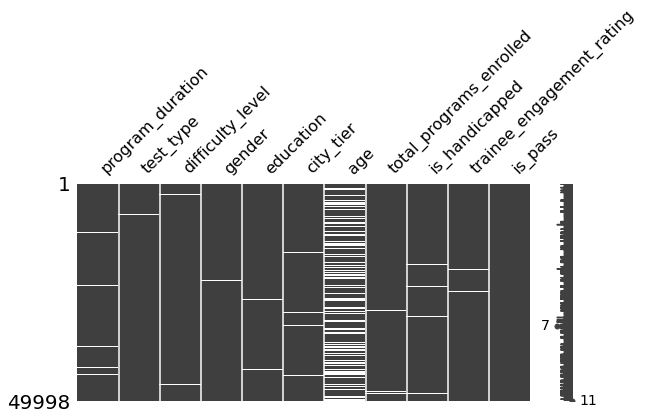

In [9]:
msno.matrix(raw_data, figsize=(9, 4))

In [10]:
raw_data.dropna(axis=0, how='any', inplace=True)

In [15]:
raw_data['is_pass'].value_counts()

1    18744
0     8212
Name: is_pass, dtype: int64

In [17]:
raw_data.head()

,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,136.0,offline,intermediate,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,131.0,offline,easy,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,120.0,online,easy,M,Matriculation,1.0,40.0,1.0,N,2.0,1
4,131.0,offline,intermediate,F,High School Diploma,1.0,42.0,2.0,N,4.0,1
5,134.0,offline,intermediate,F,High School Diploma,1.0,29.0,4.0,N,2.0,0


In [18]:
features_2_be_encoded = ['test_type', 'difficulty_level', 'gender', 'education', 'is_handicapped']

In [19]:
raw_data = raw_data.join(pd.get_dummies(raw_data[["difficulty_level"]]))
raw_data = raw_data.join(pd.get_dummies(raw_data[["education"]]))

In [20]:
raw_data.drop(['difficulty_level', 'education'], inplace=True, axis=1)

In [21]:
test_type_map = {elem: index for index, elem in enumerate(set(raw_data["test_type"]))}
gender_map = {elem: index for index, elem in enumerate(set(raw_data["gender"]))}
is_handicapped_map = {elem: index for index, elem in enumerate(set(raw_data["is_handicapped"]))}

In [22]:
test_type_map
gender_map
is_handicapped_map

{'online': 0, 'offline': 1}

{'F': 0, 'M': 1}

{'N': 0, 'Y': 1}

In [23]:
raw_data['test_type'] = raw_data['test_type'].map(test_type_map)
raw_data['gender'] = raw_data['gender'].map(gender_map)
raw_data['is_handicapped'] = raw_data['is_handicapped'].map(is_handicapped_map)

In [24]:
encoded_data = copy.deepcopy(raw_data)

In [25]:
encoded_data

,program_duration,test_type,gender,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,difficulty_level_easy,difficulty_level_hard,difficulty_level_intermediate,difficulty_level_vary hard,education_Bachelors,education_High School Diploma,education_Masters,education_Matriculation,education_No Qualification
0,136.0,1,1,3.0,24.0,5.0,0,1.0,0,0,0,1,0,0,0,0,1,0
1,131.0,1,0,4.0,26.0,2.0,0,3.0,1,1,0,0,0,0,1,0,0,0
2,120.0,0,1,1.0,40.0,1.0,0,2.0,1,1,0,0,0,0,0,0,1,0
4,131.0,1,0,1.0,42.0,2.0,0,4.0,1,0,0,1,0,0,1,0,0,0
5,134.0,1,0,1.0,29.0,4.0,0,2.0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,120.0,0,0,4.0,24.0,4.0,1,1.0,1,1,0,0,0,0,0,0,1,0
49990,136.0,1,0,2.0,45.0,1.0,0,2.0,1,1,0,0,0,0,1,0,0,0
49991,134.0,0,1,4.0,26.0,3.0,0,1.0,0,1,0,0,0,1,0,0,0,0
49992,120.0,0,0,4.0,26.0,1.0,0,1.0,1,1,0,0,0,0,0,0,1,0


In [28]:
encoded_data.to_csv('data/after_EDA/EDA_data.csv', index=None)